<a href="https://colab.research.google.com/github/fahad-213/Assignment-1---820/blob/main/Hyphenova_Pricing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HYPHENOVA NETWORK (HYP.TV)
Capstone Project Analysis.

Team Members: Fahad A., Rajashree R., Saumya A.

#Problem Statement and Scope
Hyphenova, a media startup, aims to develop a dynamic pricing model to enhance its competitive edge in the media industry. The current challenge is to create a pricing strategy that incorporates various factors such as demand, popularity, content ratings, bundling options, repeat purchases, recency, and rental time. The primary objective is to design a model that optimizes pricing based on these attributes to attract more consumers and offer a flexible pricing structure. This project requires thorough analysis and modeling using synthetic data to determine the most effective pricing methodology that balances profitability with consumer appeal.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("/content/tmdb_5000_movies.csv")

In [ ]:
df2 = pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
df_merged = pd.merge(df2, df, left_on='movie_id', right_on='id', how='left')

df_merged.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Dataset Description

**id:** An integer value serving as a unique identifier for each entry in the dataset.

**movie_id**: A unique identifier provided by IMDb for each movie.

**popularity**: A float value indicating the popularity score of the movie.

**budget**: An integer value representing the budget of the movie.

**revenue**: An integer value representing the revenue generated by the movie.

**title_x:** The original title of the movie.

**title_y:** The original title of the movie.

**cast**: Names of the main cast members of the movie.

**homepage**: The URL of the movie's official website, if available.

**tagline**: A short memorable phrase associated with the movie, often used in marketing.

**keywords**: Keywords or phrases associated with the movie for indexing and searching purposes.

**overview**: A brief summary or description of the movie.

**runtime**: The duration of the movie in minutes.

**genres**: Categories or genres that the movie belongs to.

**production_companies:** Names of the production companies involved in making the movie.

**release_date**: The date when the movie was released.

**vote_count:** The count of votes given to the movie.

**vote_average:** The average rating given to the movie.

**release_year:** The year when the movie was released.

**crew** The name of Director, Editor, Composer, Writer etc

**original_language** The language in which the movie was made.

**status** "Released" or "Rumored".

**spoken_languages** The languages that user can select to watch the movie.

**original_title** The title of the movie before translation or adaptation.


# Data Cleaning

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   id                    4803 non-null   int64  
 8   keywords              4803 non-null   object 
 9   original_language     4803 non-null   object 
 10  original_title        4803 non-null   object 
 11  overview              4800 non-null   object 
 12  popularity            4803 non-null   float64
 13  production_companies  4803 non-null   object 
 14  production_countries  4803 non-null   object 
 15  release_date         

**Checking for Duplication**

In [ ]:
duplicate_rows = df_merged[df_merged.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


**Checking for Missing Values & Removing Irrelevent features**

In [ ]:
# Checking for missing values
missing_values = df_merged.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 movie_id                   0
title_x                    0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_y                    0
vote_average               0
vote_count                 0
dtype: int64


In [ ]:
df_merged['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

As you can see, this column crew is not much telling us, so we will drop it

In [ ]:
# Drop irrelevant columns
df_merged = df_merged.drop(['movie_id', 'title_x', 'homepage', 'crew', 'id','tagline','overview','title_y','original_title'], axis=1)

# droping missing values
df_merged = df_merged.dropna()

In [ ]:
# Checking for missing values
missing_values = df_merged.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 cast                    0
budget                  0
genres                  0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
vote_average            0
vote_count              0
dtype: int64


Now we have no missing Values in the dataset.

In [ ]:
df_merged.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,2.906007e+07,21.505569,8.231205e+07,106.898125,6.094458,690.646875
std,4.073029e+07,31.822163,1.628950e+08,22.561593,1.188366,1234.852449
min,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,4.682212,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.928897,1.918199e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,28.350628,9.293886e+07,118.000000,6.800000,737.250000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


**Checking for zeros**

It does not make sence to have zeros in our dataset specially in term of 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count'

In [ ]:
# List of columns to investigate
columns_to_check = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

# Function to calculate the number of zeros and their percentage in each column
def check_zeros(df, columns):
    zero_counts = df[columns].apply(lambda col: (col == 0).sum())
    zero_percentages = zero_counts / len(df) * 100
    return pd.DataFrame({'Zero Count': zero_counts, 'Zero Percentage': zero_percentages})

# Check zeros in the specified columns
zero_summary = check_zeros(df_merged, columns_to_check)
print(zero_summary)


              Zero Count  Zero Percentage
budget              1036        21.583333
popularity             0         0.000000
revenue             1424        29.666667
runtime               34         0.708333
vote_average          61         1.270833
vote_count            60         1.250000


In [ ]:
df_merged = df_merged[df_merged['revenue'] != 0]

In [ ]:
columns_to_check = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

def check_zeros(df, columns):
    zero_counts = df[columns].apply(lambda col: (col == 0).sum())
    zero_percentages = zero_counts / len(df) * 100
    return pd.DataFrame({'Zero Count': zero_counts, 'Zero Percentage': zero_percentages})

# Check zeros in the specified columns
zero_summary = check_zeros(df_merged, columns_to_check)
print(zero_summary)


              Zero Count  Zero Percentage
budget               147         4.354265
popularity             0         0.000000
revenue                0         0.000000
runtime                1         0.029621
vote_average           2         0.059242
vote_count             2         0.059242


In [ ]:
# Columns to fill missing values with the median
columns_to_fill = ['budget', 'runtime', 'vote_average', 'vote_count']

for col in columns_to_fill:
    df_merged[col] = df_merged[col].replace(0, df_merged[col].median())

# Check zeros in the specified columns
zero_summary = check_zeros(df_merged, columns_to_check)
print(zero_summary)

              Zero Count  Zero Percentage
budget                 0              0.0
popularity             0              0.0
revenue                0              0.0
runtime                0              0.0
vote_average           0              0.0
vote_count             0              0.0


no Zeros in our dataset anymore.

In [ ]:
import json
def extract_names(json_str):
    try:
        items = json.loads(json_str)
        return ','.join([item['name'] for item in items])
    except:
        return ''

df_merged['genres'] = df_merged['genres'].apply(extract_names)
df_merged['production_companies'] = df_merged['production_companies'].apply(extract_names)
df_merged['production_countries'] = df_merged['production_countries'].apply(extract_names)
df_merged['spoken_languages'] = df_merged['spoken_languages'].apply(extract_names)
#df_merged['cast'] = df_merged['cast'].apply(extract_names)
df_merged['keywords'] = df_merged['keywords'].apply(extract_names)

# Encoding categorical columns with pd.Categorical
df_merged['original_language'] = pd.Categorical(df_merged['original_language'])
df_merged['status'] = pd.Categorical(df_merged['status'])
df_merged['genres'] = pd.Categorical(df_merged['genres'])
df_merged['production_companies'] = pd.Categorical(df_merged['production_companies'])
df_merged['production_countries'] = pd.Categorical(df_merged['production_countries'])
df_merged['spoken_languages'] = pd.Categorical(df_merged['spoken_languages'])
#df_merged['cast'] = pd.Categorical(df_merged['cast'])

This is to remove the jaon formate form the text columns.

In [ ]:
df_merged.head()

,cast,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,"English,Español",Released,7.2,11800.0
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,English,Released,6.9,4500.0
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,6.3,4466.0
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,English,Released,7.6,9106.0
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,6.1,2124.0


In [ ]:
df_merged.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.376000e+03,3376.000000,3.376000e+03,3376.000000,3376.000000,3376.000000
mean,3.997281e+07,28.260492,1.170314e+08,110.413507,6.312470,944.683649
std,4.353652e+07,35.622362,1.834831e+08,21.030537,0.868802,1392.710668
min,1.000000e+00,0.019984,5.000000e+00,41.000000,1.900000,1.000000
25%,1.100000e+07,9.957286,1.535290e+07,96.000000,5.800000,161.000000
50%,2.500000e+07,19.755221,5.175184e+07,106.000000,6.300000,440.750000
75%,5.200000e+07,36.425937,1.401651e+08,121.000000,6.900000,1091.250000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# Data preprocessing
<a id="Data preprocessing"></a>

Creating three new columns releated to the time, release_year	release_month	release_weekday

In [ ]:
# Convert release_date to datetime and extract year, month, and weekday
df_merged['release_date'] = pd.to_datetime(df_merged['release_date'], errors='coerce')
df_merged['release_year'] = df_merged['release_date'].dt.year
df_merged['release_month'] = df_merged['release_date'].dt.month
df_merged['release_weekday'] = df_merged['release_date'].dt.weekday

# Drop the original release_date column no longer needed
df_merged = df_merged.drop(columns=['release_date'])

df_merged.head()

,cast,budget,genres,keywords,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,vote_average,vote_count,release_year,release_month,release_weekday
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2787965087,162.0,"English,Español",Released,7.2,11800.0,2009,12,3
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,961000000,169.0,English,Released,6.9,4500.0,2007,5,5
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,6.3,4466.0,2015,10,0
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,1084939099,165.0,English,Released,7.6,9106.0,2012,7,0
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,284139100,132.0,English,Released,6.1,2124.0,2012,3,2


0: Monday
1: Tuesday
2: Wednesday
3: Thursday
4: Friday
5: Saturday
6: Sunday

In [ ]:
# Ensure data types are correct
df_merged['budget'] = df_merged['budget'].astype(float)
df_merged['popularity'] = df_merged['popularity'].astype(float)
df_merged['runtime'] = df_merged['runtime'].astype(float)
df_merged['revenue'] = df_merged['revenue'].astype(float)
df_merged['vote_average'] = df_merged['vote_average'].astype(float)
df_merged['vote_count'] = df_merged['vote_count'].astype(float)

Calculate Profit and Profit Margin for better understanding and comperison.

In [ ]:
df_merged['profit'] = (df_merged['revenue'] - df_merged['budget'])
df_merged['profit_margin'] = (df_merged['revenue'] - df_merged['budget']) / df_merged['revenue']

df_merged.head()

,cast,budget,genres,keywords,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,vote_average,vote_count,release_year,release_month,release_weekday,profit,profit_margin
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",237000000.0,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2.787965e+09,162.0,"English,Español",Released,7.2,11800.0,2009,12,3,2.550965e+09,0.914992
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",300000000.0,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,9.610000e+08,169.0,English,Released,6.9,4500.0,2007,5,5,6.610000e+08,0.687825
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",245000000.0,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",8.806746e+08,148.0,"Français,English,Español,Italiano,Deutsch",Released,6.3,4466.0,2015,10,0,6.356746e+08,0.721804
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",250000000.0,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,1.084939e+09,165.0,English,Released,7.6,9106.0,2012,7,0,8.349391e+08,0.769572
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",260000000.0,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2.841391e+08,132.0,English,Released,6.1,2124.0,2012,3,2,2.413910e+07,0.084955


# Exploratory Data Analysis (EDA)

In [ ]:
categorical_columns = ['genres', 'original_language', 'production_companies',
                       'production_countries', 'spoken_languages', 'status','cast','keywords']

# Calculate value counts for each categorical column
for col in categorical_columns:
    unique = len(df_merged[col].unique())
    print(f"unique counts for {col}:\n{unique}\n")


unique counts for genres:
953

unique counts for original_language:
28

unique counts for production_companies:
2751

unique counts for production_countries:
333

unique counts for spoken_languages:
437

unique counts for status:
2

unique counts for cast:
3375

unique counts for keywords:
3227



So, as it can be seen that there are 953 unique genres, 28 unique original languages, 2751 unique production companies, 333 unique production countries, 437 unique spoken languages, 2 unique statuses, 3375 unique cast members, and 3227 unique keywords.

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3376 entries, 0 to 4798
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   cast                  3376 non-null   object  
 1   budget                3376 non-null   float64 
 2   genres                3376 non-null   category
 3   keywords              3376 non-null   object  
 4   original_language     3376 non-null   category
 5   popularity            3376 non-null   float64 
 6   production_companies  3376 non-null   category
 7   production_countries  3376 non-null   category
 8   revenue               3376 non-null   float64 
 9   runtime               3376 non-null   float64 
 10  spoken_languages      3376 non-null   category
 11  status                3376 non-null   category
 12  vote_average          3376 non-null   float64 
 13  vote_count            3376 non-null   float64 
 14  release_year          3376 non-null   int32   
 15  release_m

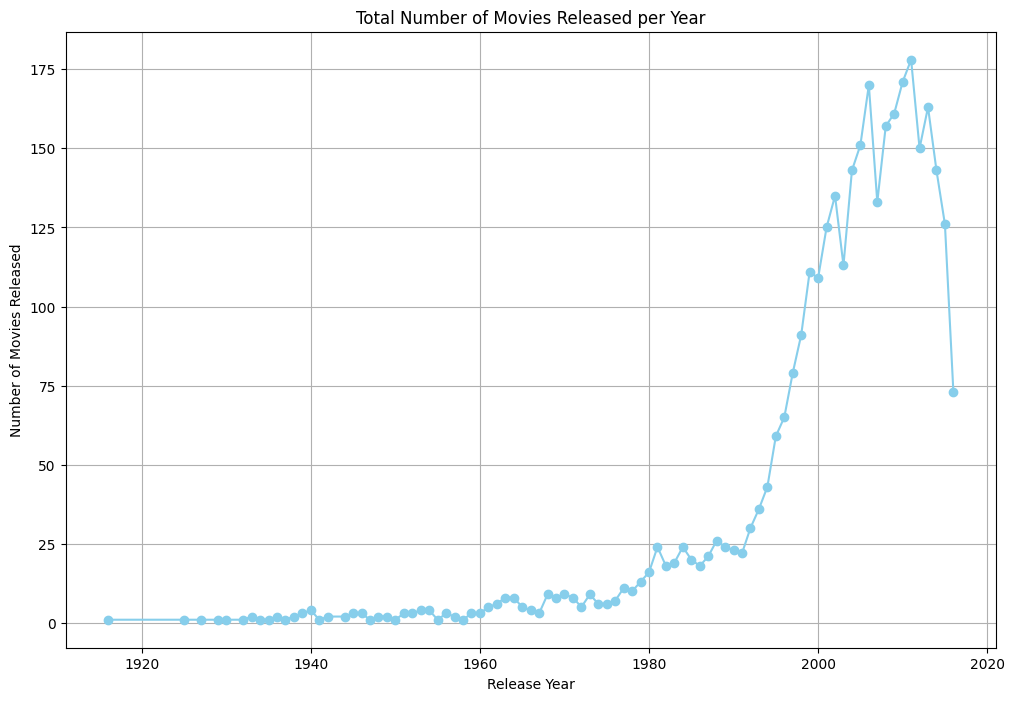

In [ ]:
# Group by release_year and count the number of movies per year
movies_per_year = df_merged.groupby('release_year').size()

# Plotting
plt.figure(figsize=(12, 8))
movies_per_year.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.title('Total Number of Movies Released per Year')
plt.grid(True)
plt.show()


There has been a significant increase in the number of movies released annually, especially from 1980 onwards, peaking around the early 2010s before a decline towards 2020.The growth rate accelerates significantly from around 1980 onwards. The peak is observed around the late 2000s to early 2010s, with over 175 movies released in a single year.

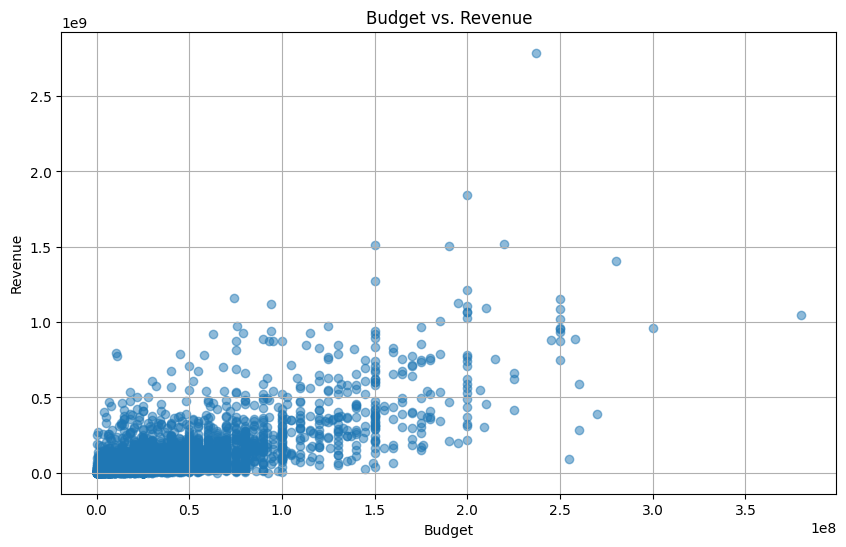

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_merged['budget'], df_merged['revenue'], alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


There is a general positive correlation between budget and revenue, meaning higher budget movies tend to generate higher revenues. However, the spread of revenue for any given budget is quite wide, indicating that not all high-budget movies are guaranteed high revenue. There are several outliers where movies with high budgets also achieved exceptionally high revenues.

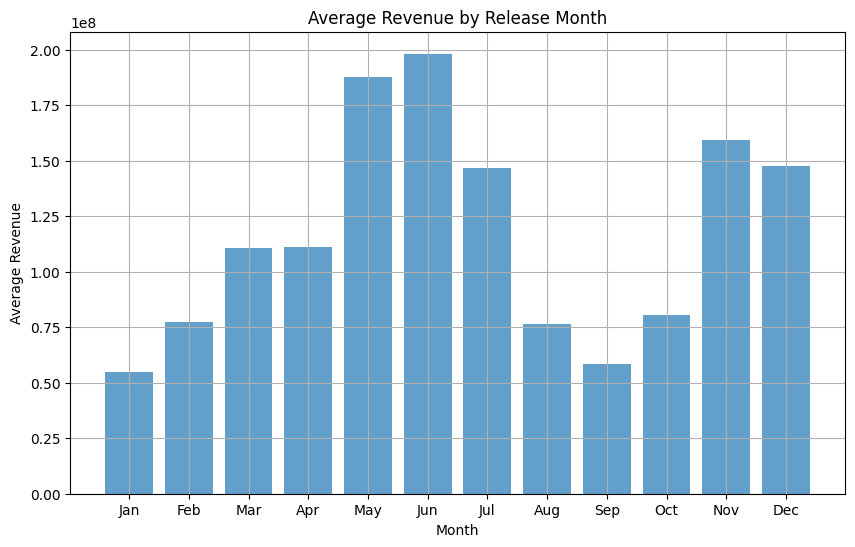

In [ ]:
import numpy as np

average_revenue_by_month = df_merged.groupby('release_month')['revenue'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_revenue_by_month.index, average_revenue_by_month.values, align='center', alpha=0.7)
plt.title('Average Revenue by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


Movies released in May and June tend to have the highest average revenues, indicating these months might be favorable for blockbuster releases.
There are revenue peaks in November and December as well, suggesting the holiday season is also lucrative for movie releases.
The lowest average revenues are seen for movies released in January, February, August, and September, indicating these months might be less favorable for high revenue generation.

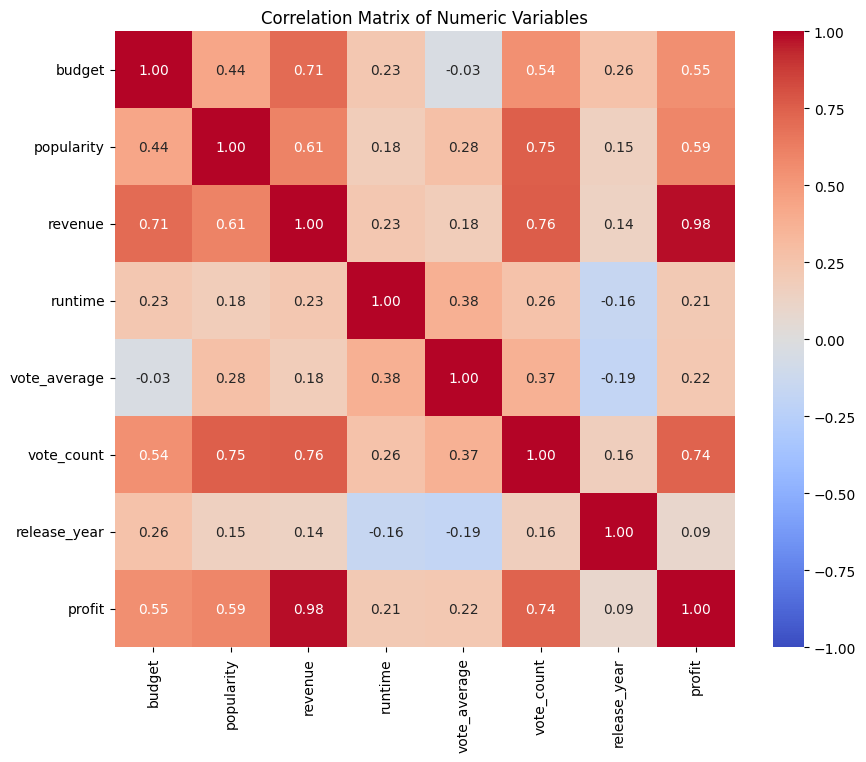

In [ ]:
import seaborn as sns

numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year', 'profit']

plt.figure(figsize=(10, 8))
sns.heatmap(df_merged[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


Revenue has a strong positive correlation with budget (0.71),
popularity (0.61), and vote_count (0.76), indicating that higher budgets, popularity, and vote counts are associated with higher revenues.

Profit is highly correlated with revenue (0.98) and vote_count (0.74), suggesting that higher revenue and vote counts are strong indicators of profit.

Popularity is moderately correlated with budget (0.44) and revenue (0.61), meaning more popular movies tend to have higher budgets and revenues.

Vote_average has a weak correlation with most variables, indicating average vote rating doesn't significantly relate to budget, revenue, or popularity.

Release_year shows almost no correlation with other variables, suggesting the year of release is not a strong predictor of budget, revenue, or other factors in the dataset.

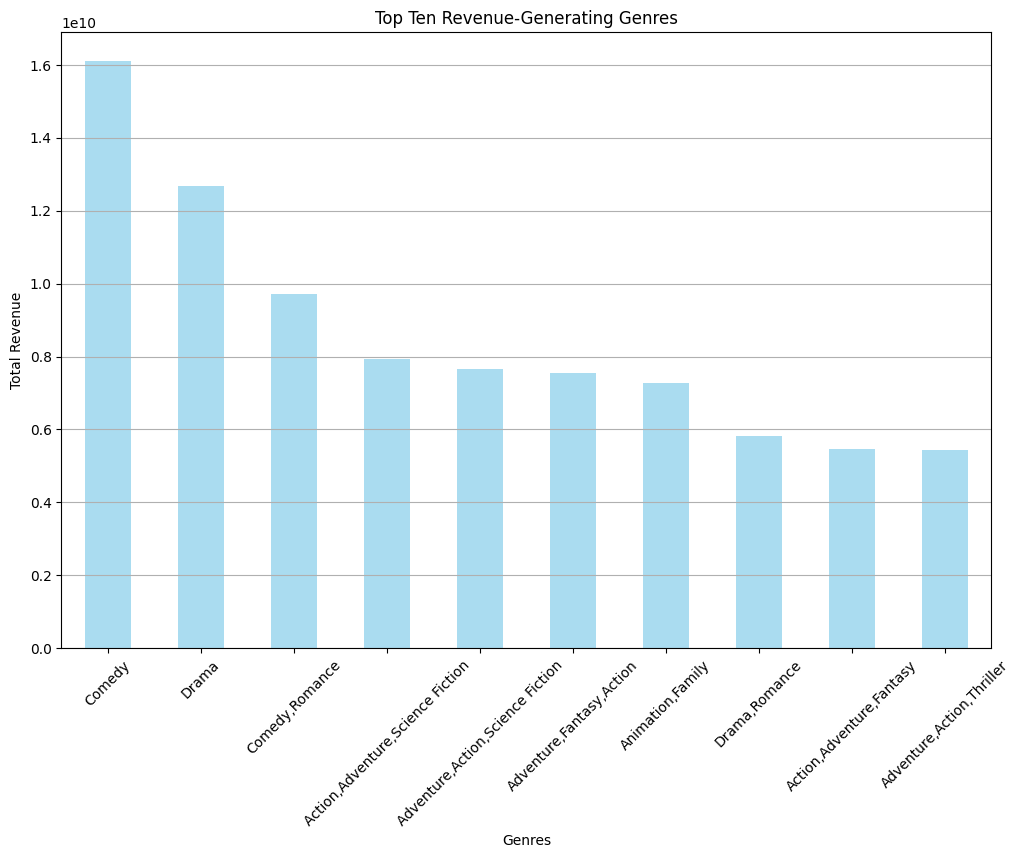

In [ ]:
# Group by genres and sum the revenue for each genre
top_ten_genres = df_merged.groupby('genres')['revenue'].sum().nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
top_ten_genres.plot(kind='bar', color='skyblue',align='center', alpha=0.7)
plt.xlabel('Genres')
plt.ylabel('Total Revenue')
plt.title('Top Ten Revenue-Generating Genres')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Comedy is the highest revenue-generating genre, with total revenue exceeding 1.6 x 10^10 (16 billion units, likely dollars).

Drama comes in second, generating about 1.3 x 10^10 in revenue.

Comedy Romance is the third highest-grossing genre, with revenue just under 1.0 x 10^10.

Action and Adventure genres appear frequently in various combinations (e.g., Action Adventure Science Fiction, Adventure Action Science Fiction, Adventure Fantasy Action), suggesting these are popular and lucrative genre combinations.

Family-oriented films (Animation Family) also feature in the top ten, indicating the importance of the family movie market.

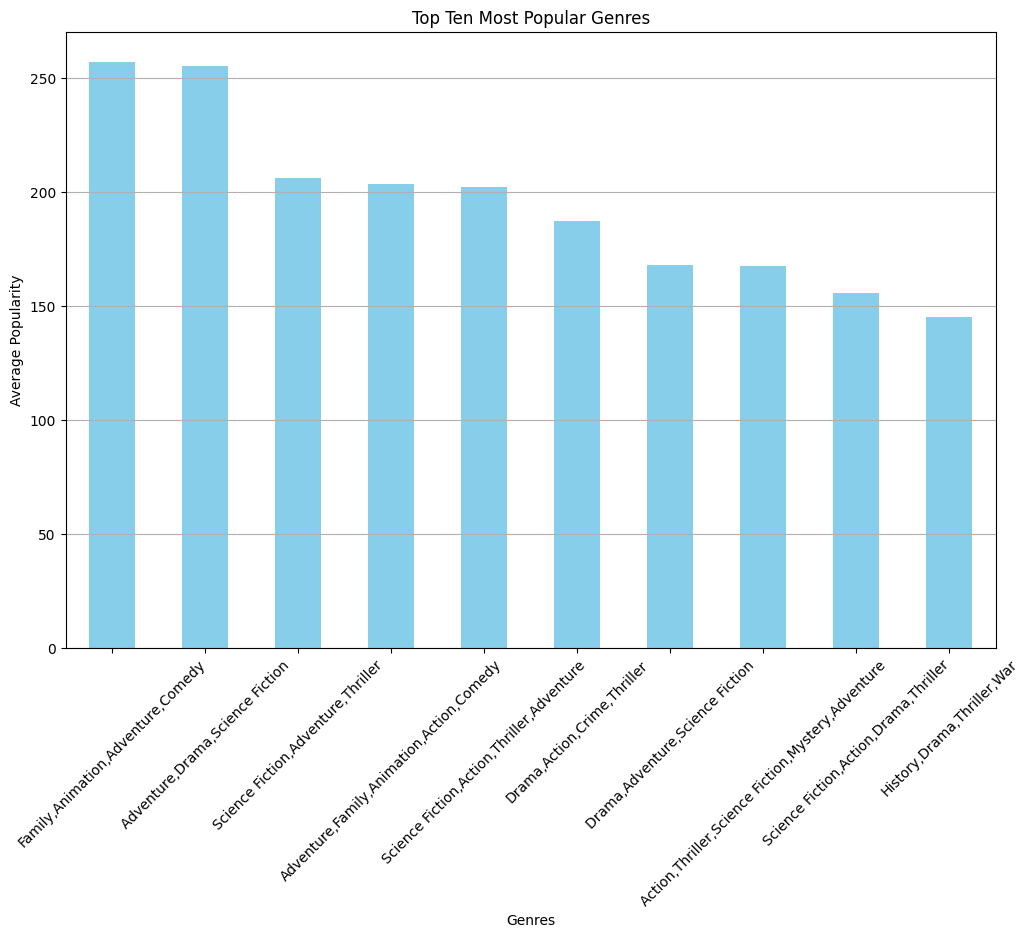

In [ ]:
# Group by genres and calculate the mean popularity for each genre
top_genres_popularity = df_merged.groupby('genres')['popularity'].mean().nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
top_genres_popularity.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average Popularity')
plt.title('Top Ten Most Popular Genres')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Family Animation Adventure Comedy is the most popular genre, with an average popularity score of about 260.

Adventure Drama Science Fiction comes in a close second, with a score just slightly below 260.

Science Fiction Adventure Thriller ranks third, with a score of about 210.

The top three genres all involve combinations of multiple genre elements, suggesting that films that blend different genres tend to be more popular.

Adventure appears in 6 out of the 10 top genres, indicating its broad appeal and versatility in combinations.

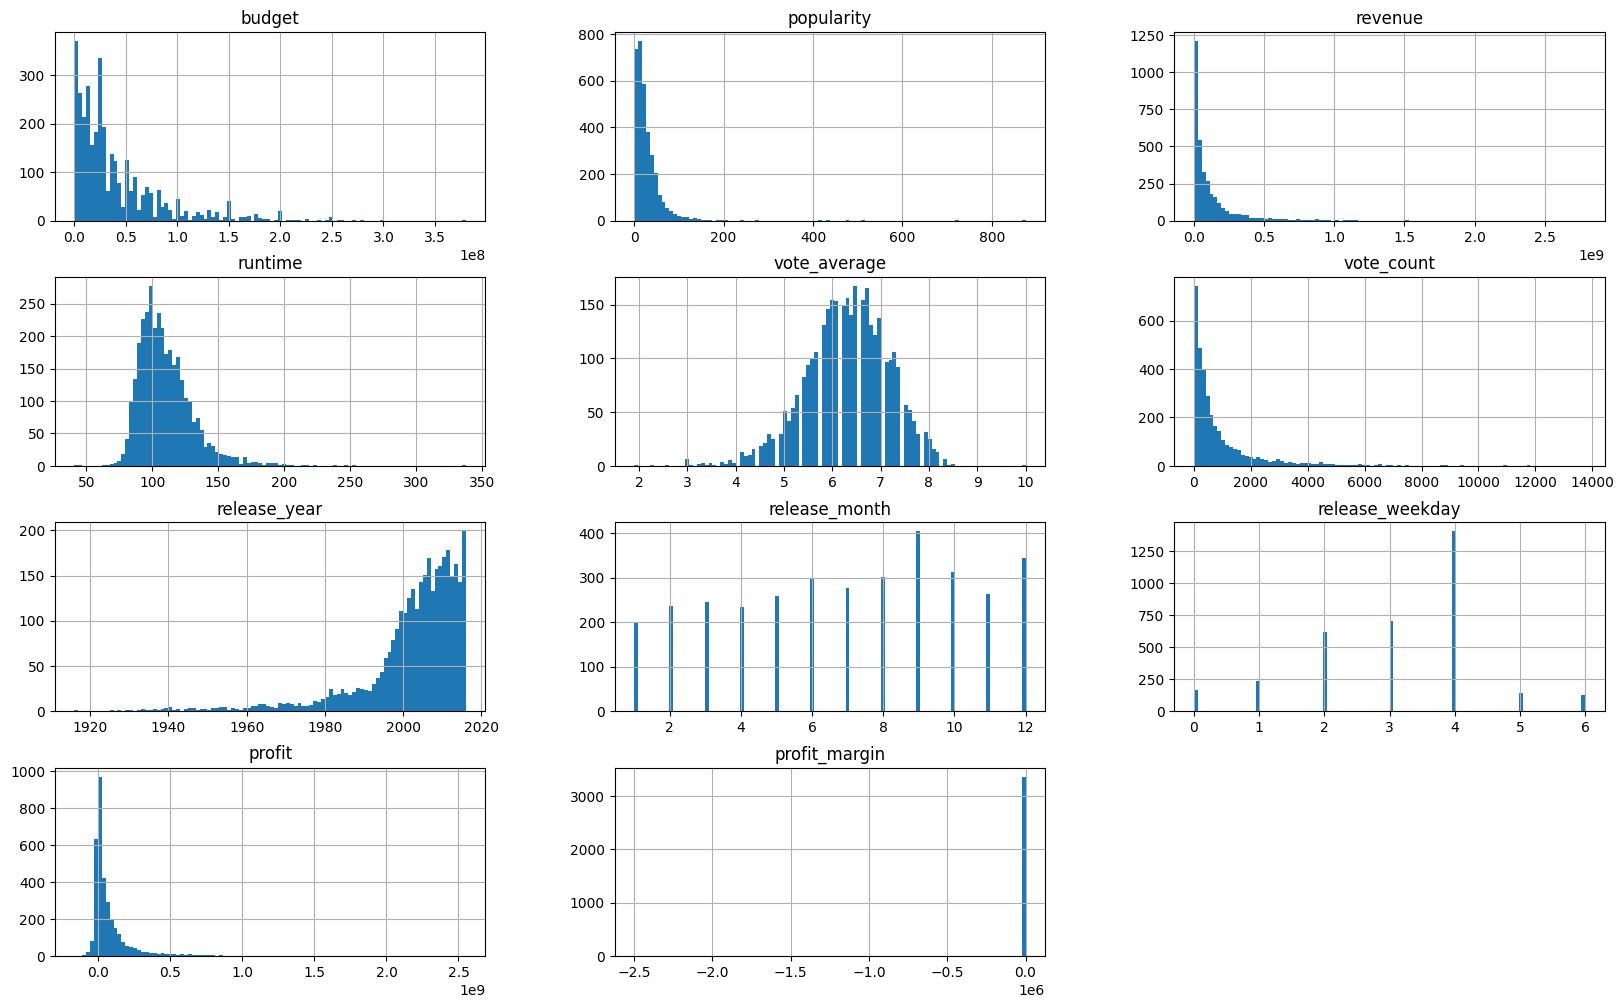

In [ ]:
df_merged.hist(figsize= (20,12), bins =100)
plt.show()

**Budget**: Most movies have lower budgets, with a long tail towards higher budgets.

**Popularity**: Highly skewed distribution with most movies having low popularity scores and a few being very popular.

**Revenue**: Similar to popularity, most movies have lower revenues with a few blockbusters earning significantly more.

**Runtime**: Bell-shaped distribution centered around 100 minutes, with most movies falling between 80-120 minutes.

**Vote Average:** Normal distribution centered around 6-7, suggesting most movies are rated above average.

**Vote Count**: Heavily skewed towards lower vote counts, indicating many movies receive few votes while a small number get many.

**Release Year:** Strong increase in the number of movies released per year from 1980 onwards, with a peak in recent years.

**Release Month:** More movies tend to be released in summer months (June-August) and November-December.

**Release Weekday:** Friday appears to be the most common release day, followed by Wednesday.

**Profit:** Similar distribution to revenue, with most movies making modest profits and a few making very large profits.

**Profit Margin:** Unusual distribution with a spike near 0 and some extreme values on both positive and negative sides.

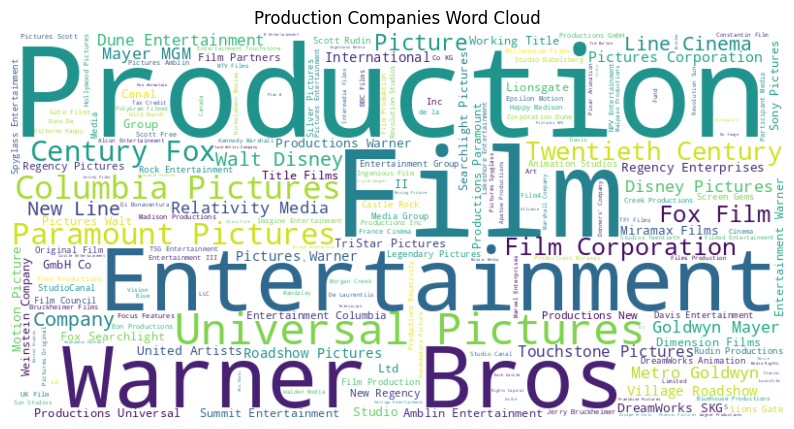

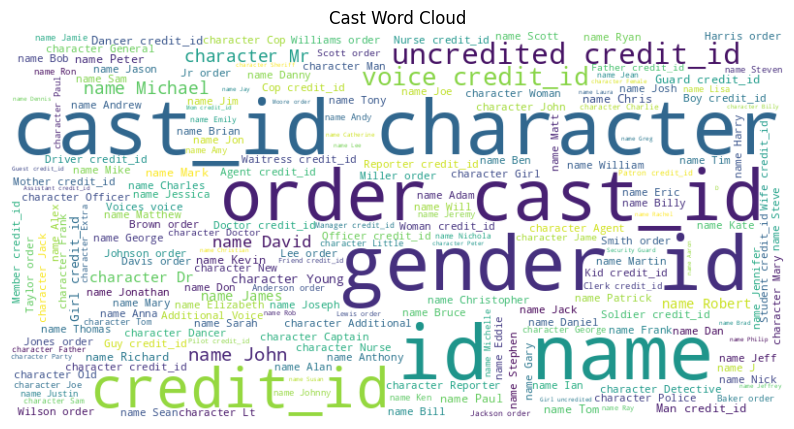

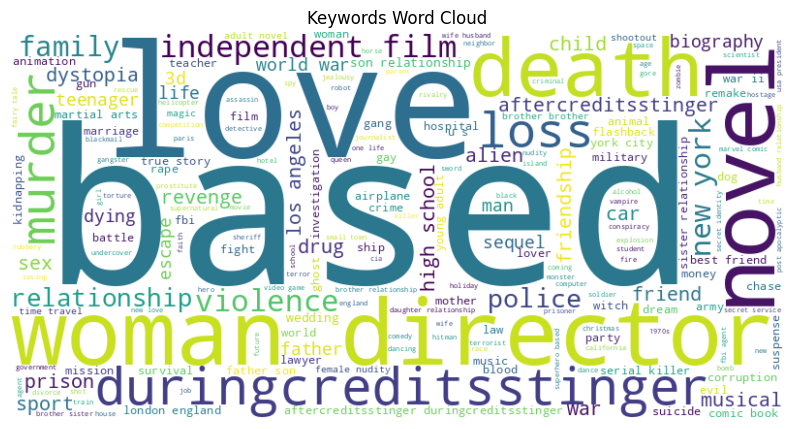

In [ ]:
from wordcloud import WordCloud

# Joining columns into corpus strings
production_companies_corpus = ' '.join(df_merged['production_companies'].dropna())
cast_corpus = ' '.join(df_merged['cast'].dropna())
keywords_corpus = ' '.join(df_merged['keywords'].dropna())

# Generate word cloud for production companies
plt.figure(figsize=(10, 6))
wc_production_companies = WordCloud(width=800, height=400, background_color='white').generate(production_companies_corpus)
plt.imshow(wc_production_companies, interpolation='bilinear')
plt.title('Production Companies Word Cloud')
plt.axis('off')
plt.show()

# Generate word cloud for cast
plt.figure(figsize=(10, 6))
wc_cast = WordCloud(width=800, height=400, background_color='white').generate(cast_corpus)
plt.imshow(wc_cast, interpolation='bilinear')
plt.title('Cast Word Cloud')
plt.axis('off')
plt.show()

# Generate word cloud for keywords
plt.figure(figsize=(10, 6))
wc_keywords = WordCloud(width=800, height=400, background_color='white').generate(keywords_corpus)
plt.imshow(wc_keywords, interpolation='bilinear')
plt.title('Keywords Word Cloud')
plt.axis('off')
plt.show()


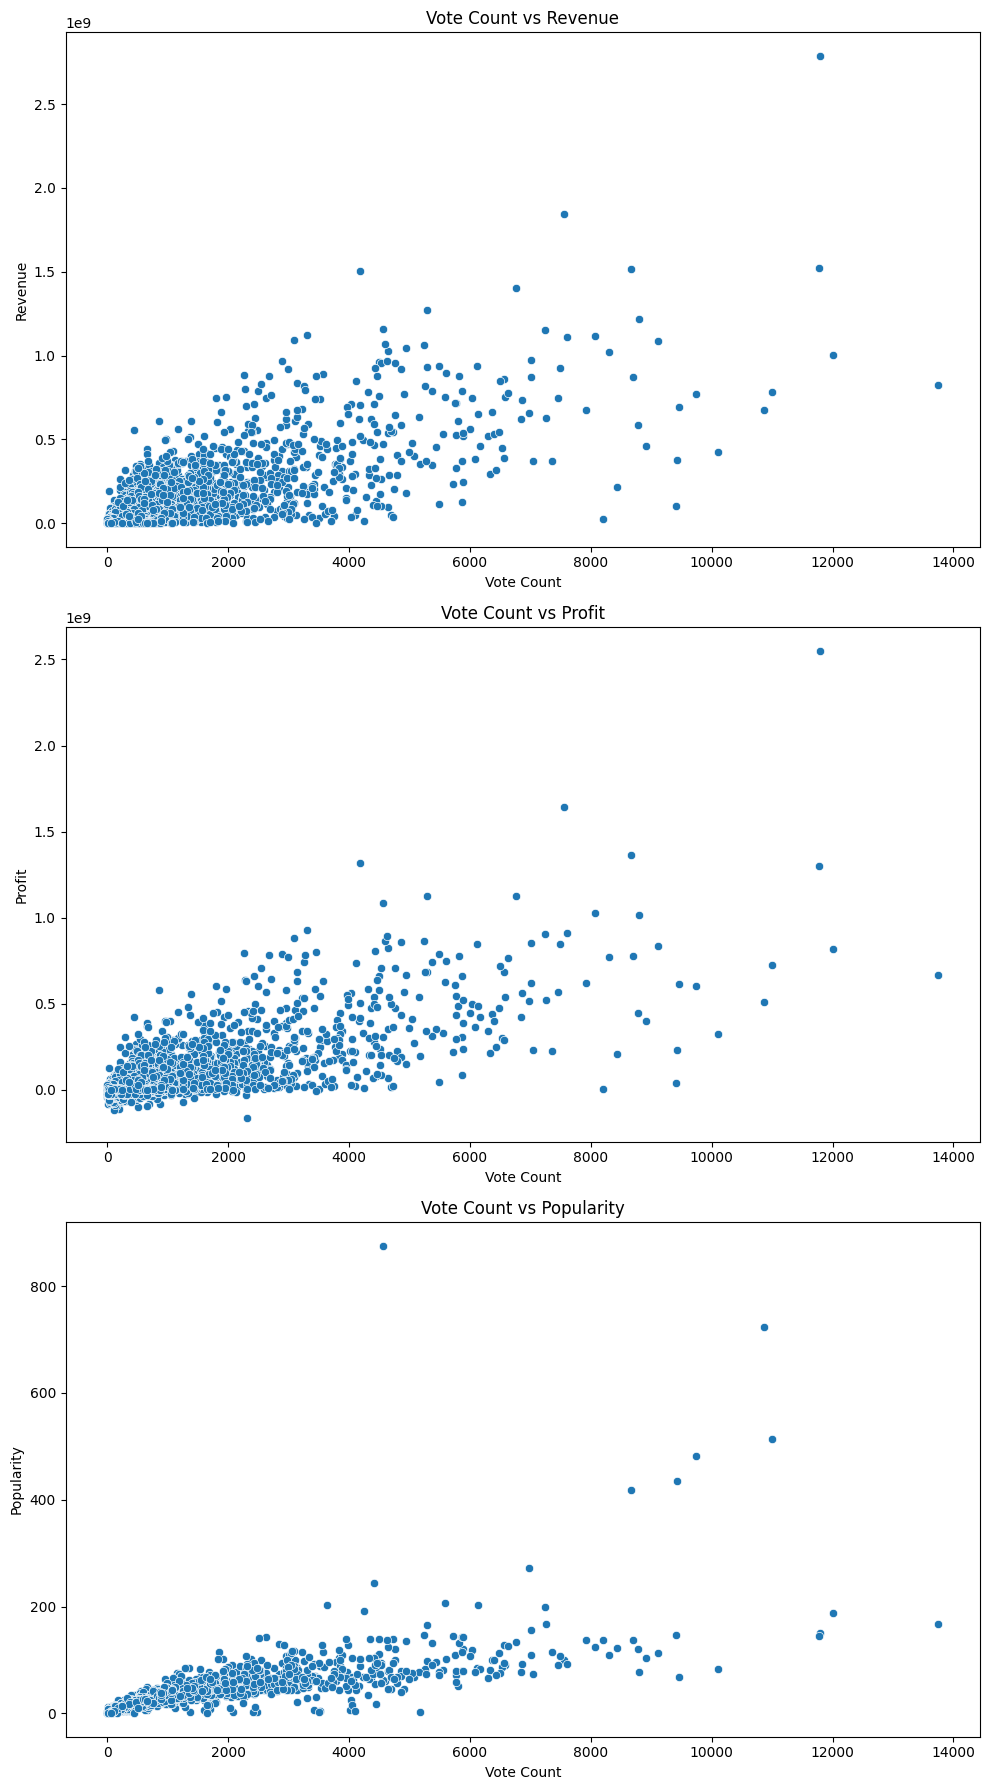

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot vote_count vs revenue
sns.scatterplot(x='vote_count', y='revenue', data=df_merged, ax=axs[0])
axs[0].set_title('Vote Count vs Revenue')
axs[0].set_xlabel('Vote Count')
axs[0].set_ylabel('Revenue')

# Plot vote_count vs profit
sns.scatterplot(x='vote_count', y='profit', data=df_merged, ax=axs[1])
axs[1].set_title('Vote Count vs Profit')
axs[1].set_xlabel('Vote Count')
axs[1].set_ylabel('Profit')

# Plot vote_count vs popularity
sns.scatterplot(x='vote_count', y='popularity', data=df_merged, ax=axs[2])
axs[2].set_title('Vote Count vs Popularity')
axs[2].set_xlabel('Vote Count')
axs[2].set_ylabel('Popularity')

plt.tight_layout()
plt.show()


**Vote Count vs Revenue:**

There's a general positive correlation between vote count and revenue.
Most data points are clustered in the lower vote count range (0-4000).
Revenue appears to increase more rapidly as vote count increases.
There are a few outliers with high revenue and relatively low vote counts.


**Vote Count vs Profit:**

Similar to revenue, there's a positive correlation between vote count and profit.
The distribution of points is very similar to the revenue plot, suggesting a strong relationship between revenue and profit.
Profit values seem slightly lower than revenue values, which is expected.
There are some instances of high profits with relatively low vote counts.


**Vote Count vs Popularity:**

There's a positive correlation between vote count and popularity, but it's less pronounced than with revenue or profit.
The popularity scale seems to max out around 900, unlike revenue and profit which go into billions.
There's more scatter in this plot, indicating that factors other than vote count significantly influence popularity.
A few outliers show very high popularity with relatively low vote counts.



**General observations:**

All three metrics (revenue, profit, popularity) tend to increase with vote count, suggesting that more popular items (likely movies or products) generate more votes and more financial success.
The relationships aren't perfectly linear, indicating other factors are at play.

# Feature Importance

Revenue OLS Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

y = df_merged['revenue']

independent_vars = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year', 'profit', 'profit_margin']

# Standardize independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_merged[independent_vars])

# Fit OLS models for each standardized variable
for col in independent_vars:
    X = sm.add_constant(df_merged[col])

    # Fit OLS model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print results summary
    print(f"\n\n===== OLS Regression Results for {col} =====")
    print(results.summary())



===== OLS Regression Results for budget =====
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     3362.
Date:                Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                        02:30:28   Log-Likelihood:                -67860.
No. Observations:                3376   AIC:                         1.357e+05
Df Residuals:                    3374   BIC:                         1.357e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

**Vote Count**:

R-squared: 0.575
Adj. R-squared: 0.575
P-value: < 0.001
Interpretation: Vote count has a high adjusted R-squared value, indicating it explains a significant portion of the variance in revenue. The low p-value suggests its statistical significance.

**Profit:**

R-squared: 0.961
Adj. R-squared: 0.961
P-value: < 0.001
Interpretation: Profit also shows a very high adjusted R-squared value, indicating it strongly explains revenue variation. The very low p-value indicates its statistical significance.

**Budget**:

R-squared: 0.499
Adj. R-squared: 0.499
P-value: < 0.001
Interpretation: Budget has a moderate adjusted R-squared value and a low p-value, indicating its importance in predicting revenue.

Popularity, Runtime, Vote Average, and Release Year all show varying degrees of explanatory power and statistical significance. While they contribute to understanding revenue, their impact is less compared to Vote Count, Profit, and Budget.

Profit Margin, with a higher p-value and very low R-squared values, suggests it may not be a strong predictor of revenue in this context.

**Final Recommendation**
Based on these observations, for pricing model aimed at dynamic pricing in a movie omni-channel network, prioritize Vote Count, Profit, and Budget due to their substantial explanatory power and statistical significance. Consider Popularity as a secondary factor given its moderate impact. The other variables may provide additional context but might not significantly enhance predictive accuracy compared to these primary predictors.

In [ ]:
df_with_dummies = pd.get_dummies(df_merged, columns=['release_month', 'release_weekday'], drop_first=True)


In [ ]:
y = df_merged['revenue']

independent_vars = ['release_month', 'release_weekday']

for col in independent_vars:
    X = sm.add_constant(df_merged[col])

    # Fit OLS model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print results summary
    print(f"\n\n===== OLS Regression Results for {col} =====")
    print(results.summary())



===== OLS Regression Results for release_month =====
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.353
Date:                Fri, 12 Jul 2024   Prob (F-statistic):             0.0370
Time:                        17:23:06   Log-Likelihood:                -69025.
No. Observations:                3376   AIC:                         1.381e+05
Df Residuals:                    3374   BIC:                         1.381e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

For release_month, the model suggests a very small effect (R-squared = 0.001), but the coefficient for release_month is statistically significant (p-value = 0.037), indicating that the month of release might have a slight impact on revenue.

For release_weekday, the model shows a more pronounced effect (R-squared = 0.027), with the coefficient for release_weekday being highly statistically significant (p-value = 1.05e-21), suggesting that the weekday of release significantly affects revenue.

**Recommendation:**
Based on these results, you may consider including release_weekday in your pricing model due to its higher impact and statistical significance. release_month, while statistically significant, has a very small effect,

In [ ]:
import statsmodels.formula.api as smf
model_months = smf.ols(formula='revenue ~ C(release_month)', data=df_merged).fit()

print(model_months.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     22.49
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           5.49e-45
Time:                        02:31:02   Log-Likelihood:                -68907.
No. Observations:                3376   AIC:                         1.378e+05
Df Residuals:                    3364   BIC:                         1.379e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.46

Model Quality: The R-squared value indicates that the model explains only about 6.9% of the variability in revenue, which is quite low, suggesting that other factors not included in the model are likely influencing movie revenue.


Statistical Significance: The F-statistic and its associated p-value indicate that the model as a whole is statistically significant, but individual month effects vary.

In [ ]:
model_months = smf.ols(formula='revenue ~ C(release_weekday)', data=df_merged).fit()

print(model_months.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     27.46
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           3.67e-32
Time:                        02:33:26   Log-Likelihood:                -68947.
No. Observations:                3376   AIC:                         1.379e+05
Df Residuals:                    3369   BIC:                         1.379e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

R-squared and Adj. R-squared: Both values are low, indicating that the model explains only about 4.7% (or 4.5% when adjusted) of the variability in revenue. This suggests that other factors not included in the model are likely influencing movie revenue.


F-statistic and Prob (F-statistic): The model as a whole is statistically significant.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Fit OLS model using formula
model_genres = smf.ols(formula='revenue ~ C(status)', data=df_merged).fit()

# Print results summary
print(model_genres.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4010
Date:                Fri, 12 Jul 2024   Prob (F-statistic):              0.527
Time:                        17:23:06   Log-Likelihood:                -69027.
No. Observations:                3376   AIC:                         1.381e+05
Df Residuals:                    3374   BIC:                         1.381e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.417e+

The overall model has a very low R-squared value of 0.000, indicating that the movie status (status) does not explain much of the variation in revenue.

**Recommendation:**
Based on these results, it may not be beneficial to include status as a predictor in pricing model, as it does not show a significant association with movie revenue in this analysis.

In [ ]:
# Construct the formula for OLS regression
formula = 'revenue ~ C(original_language)'

# Fit OLS model using the formula
model = smf.ols(formula=formula, data=df_merged).fit()

# Print the summary of the regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.112
Date:                Fri, 12 Jul 2024   Prob (F-statistic):              0.314
Time:                        17:23:06   Log-Likelihood:                -69012.
No. Observations:                3376   AIC:                         1.381e+05
Df Residuals:                    3348   BIC:                         1.383e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

**Interpretation:**
The overall model has a very low R-squared value of 0.009, indicating that the original language does not explain much of the variation in movie revenue.
None of the original languages show a statistically significant impact on revenue, as indicated by their high p-values (> 0.05).

**Recommendation:**
Based on these results, including original_language as predictors in your pricing model may not provide meaningful predictive power for revenue. It's advisable to focus on other potentially more impactful variables or reconsider the approach to include language-related factors.

In [ ]:
# Construct the formula for OLS regression
formula = 'revenue ~ C(genres)'

# Fit OLS model using the formula
model = smf.ols(formula=formula, data=df_merged).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     2.711
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           6.23e-85
Time:                        17:23:09   Log-Likelihood:                -67803.
No. Observations:                3376   AIC:                         1.375e+05
Df Residuals:                    2423   BIC:                         1.433e+05
Df Model:                         952                                         
Covariance Type:            nonrobust                                         
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

**Statistical Significance**: Both the F-statistic and the associated p-value suggest that the model is statistically significant, meaning that the genres included in the model collectively have a significant impact on movie revenue.

**Adjustment:** The adjusted R-squared suggests that while the model fits reasonably well, adding more predictors (genres) doesn't improve the explanatory power substantially beyond the base model.

In [ ]:
genre_ols=pd.read_excel('/content/ols_regression_summary genres.xlsx')
genre_ols = genre_ols[genre_ols['P>|t|'].astype(float) <= 0.05]

genre_ols


,Unnamed: 0,coef,std err,t,P>|t|,[0.025,0.975]
5,"C(genres)[T.Action,Adventure,Animation,Family]",629800000,213000000,2.955,0.003,212000000,1050000000
6,"C(genres)[T.Action,Adventure,Animation,Family,...",553300000,213000000,2.597,0.009,135000000,971000000
17,"C(genres)[T.Action,Adventure,Comedy,Family,Fan...",572800000,213000000,2.688,0.007,155000000,991000000
23,"C(genres)[T.Action,Adventure,Comedy,Science Fi...",513900000,185000000,2.785,0.005,152000000,876000000
28,"C(genres)[T.Action,Adventure,Crime]",428900000,174000000,2.465,0.014,87700000,770000000
...,...,...,...,...,...,...,...
859,"C(genres)[T.Science Fiction,Adventure,Thriller]",750400000,213000000,3.522,0.000,333000000,1170000000
877,"C(genres)[T.Science Fiction,Thriller,Drama]",480600000,185000000,2.604,0.009,119000000,842000000
889,"C(genres)[T.Thriller,Action,Drama,Science Fict...",481200000,213000000,2.258,0.024,63300000,899000000
932,"C(genres)[T.War,Action]",540600000,213000000,2.537,0.011,123000000,959000000


**Positive Impact**: Genres like Action, Adventure, Animation, Family, and combinations including Fantasy and Science Fiction consistently show positive impacts on revenue. This indicates that these genres tend to attract larger audiences or have higher box office appeal.

**Statistical Significance:** These results are statistically significant (p ≤ 0.05), indicating a high confidence level that the observed revenue differences are not due to random chance.

In [ ]:
# Construct the formula for OLS regression
formula = 'revenue ~ C(production_countries)'

# Fit OLS model using the formula
model = smf.ols(formula=formula, data=df_merged).fit()

# Print the summary of the regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.209
Date:                Fri, 12 Jul 2024   Prob (F-statistic):            0.00823
Time:                        17:23:10   Log-Likelihood:                -68818.
No. Observations:                3376   AIC:                         1.383e+05
Df Residuals:                    3043   BIC:                         1.403e+05
Df Model:                         332                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                          coef    std err          t      P>|t|      [0.025      0

**Model Fit**: Adjusted for the number of production countries, the adjusted R-squared is 2.0%, suggesting that the model may not fit the data well.

In [ ]:
df_merged['cast'] = df_merged['cast'].astype(str)

def process_json_column(column):
    try:
        if pd.isna(column):
            return None
        column_list = json.loads(column)
        names = [entry['name'] for entry in column_list]
        return ', '.join(names)
    except Exception as e:
        print(f"Error processing column: {str(e)}")
        return None

df_merged['cast'] = df_merged['cast'].apply(process_json_column)

In [ ]:
df_merged['cast'] = df_merged['cast'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Initialize an empty set for unique cast members
unique_cast = set()

# Function to update unique_cast with elements from each list
def update_unique_cast(x):
    if isinstance(x, list):
        unique_cast.update(x)

# Apply the function to each element in the 'cast' column
df_merged['cast'].apply(update_unique_cast)


0       None
1       None
2       None
3       None
4       None
        ... 
4775    None
4788    None
4792    None
4796    None
4798    None
Name: cast, Length: 3376, dtype: object

In [ ]:
df_merged['cast'] = df_merged['cast'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 and isinstance(x[0], list) else x)

# Extract unique cast members
unique_cast = set()
df_merged['cast'].apply(unique_cast.update)

# Convert the set to a sorted list of unique cast members
unique_cast_list = sorted(unique_cast)

# Display the unique cast members
len(unique_cast_list)

46307

In [ ]:
# Calculate number of movies per actor
actor_movie_counts = {}
for actors in df_merged['cast']:
    for actor in actors:
        if actor in actor_movie_counts:
            actor_movie_counts[actor] += 1
        else:
            actor_movie_counts[actor] = 1

# Filter actors based on criteria
min_movies_per_actor = 5
filtered_actors = [actor for actor, count in actor_movie_counts.items() if count >= min_movies_per_actor]

# Create dummy variables for filtered actors
actors_df = pd.DataFrame(0, index=df_merged.index, columns=filtered_actors)

for i, row in df_merged.iterrows():
    for actor in row['cast']:
        if actor in filtered_actors:
            actors_df.loc[i, actor] = 1

# Concatenate actors dummy variables with original dataframe
df_merged_with_dummies = pd.concat([df_merged, actors_df], axis=1)

# Prepare data for OLS model
X = df_merged_with_dummies[filtered_actors]  # Use only filtered actor columns
X = sm.add_constant(X)
y = df_merged_with_dummies['revenue']

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print OLS model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     5.819
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           1.21e-72
Time:                        17:24:08   Log-Likelihood:                -62448.
No. Observations:                3376   AIC:                         1.309e+05
Df Residuals:                     363   BIC:                         1.494e+05
Df Model:                        3012                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

 These indicate the statistical significance of each coefficient. A low p-value (typically < 0.05) suggests that the coefficient is statistically significant and that the predictor variable has a significant impact on revenue.

 The adjusted R-squared is 0.811, which adjusts the R-squared value based on the number of independent variables in the model. It penalizes the R-squared for including more predictors, giving a more realistic assessment of the model's goodness of fit.



In [ ]:
cast_ols=pd.read_excel('/content/ols_regression_summary_cast (2).xlsx')
cast_ols = cast_ols[cast_ols['P>|t|'].astype(float) <= 0.05]

cast_ols


,Unnamed: 0,coef,std err,t,P>|t|,[0.025,0.975]
0,const,2.976000e+07,5580000,5.332,0.000,18800000,40700000
8,CCH Pounder,3.039000e+08,148000000,2.055,0.041,13100000,595000000
10,Laz Alonso,5.680000e+08,170000000,3.338,0.001,233000000,903000000
14,Terry Notary,5.242000e+08,190000000,2.766,0.006,151000000,897000000
15,Julene Renee,1.158000e+09,239000000,4.836,0.000,687000000,1630000000
...,...,...,...,...,...,...,...
2990,Carl Weathers,4.200000e+08,160000000,2.618,0.009,104000000,735000000
2995,Betsy Russell,1.105000e+09,544000000,2.033,0.043,36300000,2170000000
3005,Strother Martin,1.840000e+08,87100000,2.111,0.035,12600000,355000000
3009,Katie Featherston,1.550000e+08,39500000,3.927,0.000,77400000,233000000


In [ ]:
# Construct the formula for OLS regression
formula = 'revenue ~ C(spoken_languages)'

# Fit OLS model using the formula
model = smf.ols(formula=formula, data=df_merged).fit()

# Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.189
Date:                Fri, 12 Jul 2024   Prob (F-statistic):            0.00711
Time:                        17:24:10   Log-Likelihood:                -68753.
No. Observations:                3376   AIC:                         1.384e+05
Df Residuals:                    2939   BIC:                         1.411e+05
Df Model:                         436                                         
Covariance Type:            nonrobust                                         
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

**Model Fit:** The low R-squared and adjusted R-squared values (0.150 and 0.024, respectively) indicate that this model does not fit the data well in terms of explaining movie revenue variability. Most of the variability in revenue is not captured by the model.

**Statistical Significance**: While the model is statistically significant (due to the significant F-statistic), the low R-squared suggests that the predictors included (spoken languages) might not adequately explain revenue variations.

In [ ]:
spoken_languages=pd.read_excel('/content/ols_regression_summary (3).xlsx')
spoken_languages = spoken_languages[spoken_languages['P>|t|'].astype(float) <= 0.05]

spoken_languages


,Unnamed: 0,coef,std err,t,P>|t|,[0.025,0.975]
26,"C(spoken_languages)[T.Deutsch,English,Italiano...",380000000,190000000,1.999,0.046,7180000,753000000
29,"C(spoken_languages)[T.Deutsch,English,svenska]",664500000,190000000,3.495,0.000,292000000,1040000000
33,"C(spoken_languages)[T.Deutsch,Français,Latin,ا...",423400000,190000000,2.227,0.026,50600000,796000000
40,"C(spoken_languages)[T.Deutsch,ελληνικά,English]",456300000,190000000,2.400,0.016,83500000,829000000
63,"C(spoken_languages)[T.English,Deutsch,Pусский]",311800000,119000000,2.612,0.009,77800000,546000000
80,"C(spoken_languages)[T.English,Español]",131100000,60000000,2.184,0.029,13400000,249000000
82,"C(spoken_languages)[T.English,Español,Deutsch,...",372100000,190000000,1.957,0.050,-744000,745000000
86,"C(spoken_languages)[T.English,Español,Italiano...",568200000,190000000,2.989,0.003,195000000,941000000
90,"C(spoken_languages)[T.English,Español,Portuguê...",608300000,190000000,3.199,0.001,235000000,981000000
96,"C(spoken_languages)[T.English,Español,ภาษาไทย]",729100000,190000000,3.834,0.000,356000000,1100000000



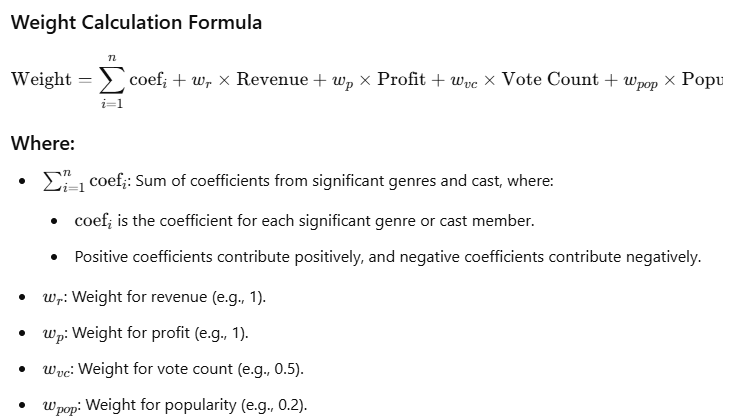

In [ ]:
df_filtered = df_merged[(df_merged['release_year'] >= 2010) & (df_merged['release_year'] <= 2020)]

In [ ]:
import statsmodels.formula.api as smf

# Construct the formula for OLS regression
formula = 'revenue ~ C(release_year)'

# Fit OLS model using the formula
model = smf.ols(formula=formula, data=df_filtered).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.490
Date:                Sat, 13 Jul 2024   Prob (F-statistic):             0.0214
Time:                        16:15:49   Log-Likelihood:                -20719.
No. Observations:                1004   AIC:                         4.145e+04
Df Residuals:                     997   BIC:                         4.149e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
import statsmodels.formula.api as smf

# Construct the formula for OLS regression
formula = 'revenue ~ C(release_weekday)'

# Fit OLS model using the formula
model = smf.ols(formula=formula, data=df_filtered).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     18.66
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.22e-20
Time:                        16:36:32   Log-Likelihood:                -20673.
No. Observations:                1004   AIC:                         4.136e+04
Df Residuals:                     997   BIC:                         4.139e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [ ]:
df_merged.release_year.value_counts()

release_year
2011    178
2010    171
2006    170
2013    163
2009    161
       ... 
1958      1
1950      1
1927      1
1930      1
1925      1
Name: count, Length: 89, dtype: int64